In [17]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac
import numpy as np
from ase.units import Hartree

# Perform standard ground state calculation (with plane wave basis)
si = bulk('Si', 'diamond', 5.43)
si.center()


calc = GPAW(mode=PW(400),xc='PBE',setups='sg15',
            kpts=(16, 16, 16),symmetry='off',
            occupations=FermiDirac(0.0001))
si.calc = calc
si.get_potential_energy()
calc.write('Si_gs.gpw')


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  1.5.1
 |___|_|             

User:   drg@forsite
Date:   Wed May  8 11:42:49 2019
Arch:   x86_64
Pid:    21942
Python: 3.6.7
gpaw:   /usr/local/lib/python3.6/dist-packages/gpaw
_gpaw:  /usr/local/lib/python3.6/dist-packages/
        _gpaw.cpython-36m-x86_64-linux-gnu.so
ase:    /home/drg/.local/lib/python3.6/site-packages/ase (version 3.17.0)
numpy:  /home/drg/.local/lib/python3.6/site-packages/numpy (version 1.16.3)
scipy:  /home/drg/.local/lib/python3.6/site-packages/scipy (version 1.2.1)
units:  Angstrom and eV
cores:  1

Input parameters:
  kpts: [16 16 16]
  mode: {ecut: 400.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.0001}
  setups: sg15
  symmetry: off
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

Norm-conserving UPF setup:
  Element:   Si
  Z:         14
  Vale

In [115]:
from TDSE7 import TDSE
tdse=TDSE(calc)

In [116]:
epsilon,freq=tdse.linear_response(dt=1,steps=3000)


  5%|▌         | 152/3000 [01:14<22:43,  2.09it/s]


 10%|█         | 303/3000 [02:26<20:10,  2.23it/s]


 15%|█▌        | 454/3000 [03:38<19:59,  2.12it/s]


 20%|██        | 605/3000 [04:50<19:06,  2.09it/s]


 25%|██▌       | 756/3000 [06:04<16:31,  2.26it/s]


 30%|███       | 907/3000 [07:18<17:25,  2.00it/s]


 35%|███▌      | 1057/3000 [08:34<14:49,  2.18it/s]


 40%|████      | 1205/3000 [09:49<15:06,  1.98it/s]


 45%|████▌     | 1353/3000 [11:02<11:42,  2.34it/s]


 50%|█████     | 1501/3000 [12:15<12:16,  2.04it/s]


 55%|█████▍    | 1649/3000 [13:26<10:12,  2.20it/s]


 60%|█████▉    | 1797/3000 [14:36<09:28,  2.12it/s]


 65%|██████▍   | 1945/3000 [15:48<08:51,  1.99it/s]


 70%|██████▉   | 2093/3000 [17:02<06:57,  2.17it/s]


 75%|███████▍  | 2241/3000 [18:14<05:21,  2.36it/s]


 80%|███████▉  | 2389/3000 [19:26<04:40,  2.17it/s]


 85%|████████▍ | 2537/3000 [20:39<03:07,  2.47it/s]


 90%|████████▉ | 2685/3000 [21:50<02:27,  2.14it/s]


 94%|█████████▍| 2833/3000 [23:02<01:11,  2.34it/s]


 99%|█████████▉| 2981/3000 [24:14<00:10,  1.75it/s]


100%|██████████| 3000/3000 [24:23<00:00,  2.14it/s]/home/drg/Documents/GitHub/TDDFT/RT-VG/TDSE7.py:75: RuntimeWarning: divide by zero encountered in true_divide
  epsilon=1+4*np.pi*1j*sigma/freq


In [122]:
np.save('J',J)

In [123]:
J.size

3000

In [118]:
J=tdse.J[:,2]
time=np.arange(J.size)/41.341 

/home/drg/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


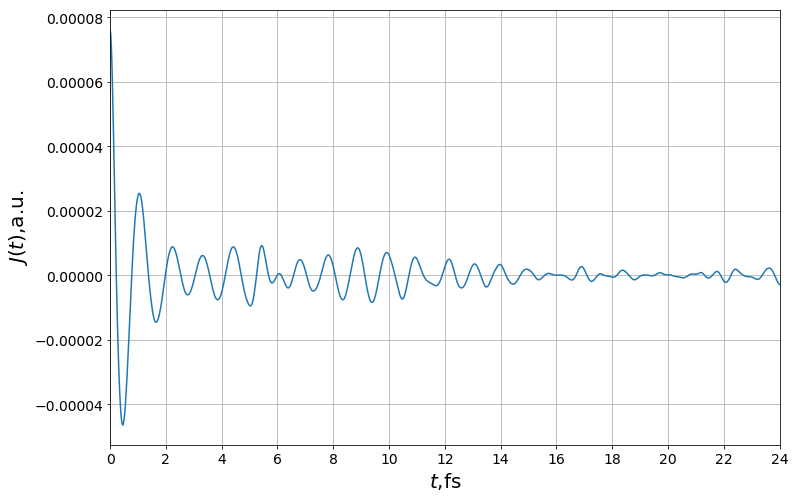

In [119]:
plt.figure(figsize=(12,8))
plt.plot(time,-J)
plt.grid()
plt.xlim([0,24])
plt.xticks(np.arange(0,25,2),fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('$t$,fs',fontsize=20)
plt.ylabel('$J(t)$,a.u.',fontsize=20)
plt.savefig('current.png',dpi=600)

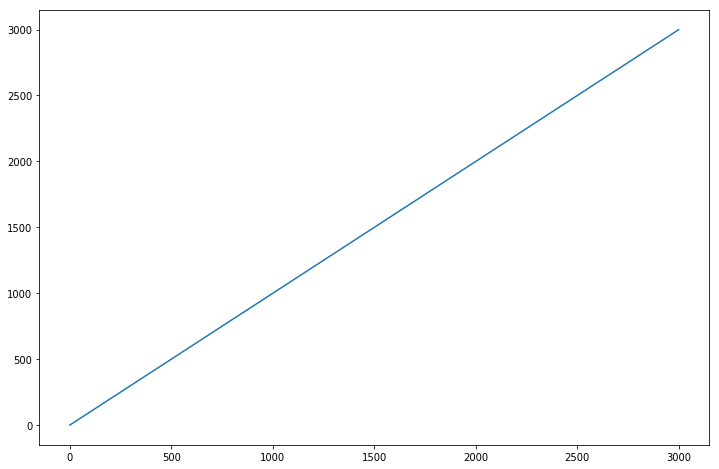

In [121]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(J.size)*1)

In [89]:
epsilon.real[int(freq.size/2)]=0

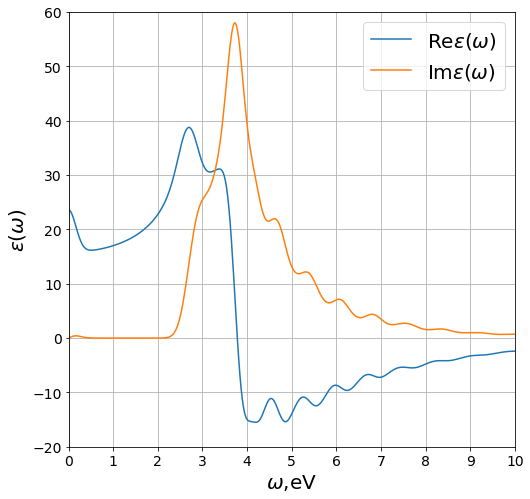

In [103]:
import matplotlib.pyplot as plt
from ase.units import Hartree
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.figure(figsize=(8,8))
plt.plot(freq*Hartree,gaussian_filter1d(epsilon.real,6),label='Re$\epsilon(\omega)$')
plt.plot(freq*Hartree,gaussian_filter1d(epsilon.imag,6),label='Im$\epsilon(\omega)$')


plt.legend(fontsize=20,loc='best')
plt.xlabel('$\omega$,eV',fontsize=20)
plt.ylabel('$\epsilon(\omega)$',fontsize=20)
plt.xticks(np.arange(-10,11),fontsize=14)
plt.yticks(np.arange(-100,110,10),fontsize=14)
plt.grid()
plt.xlim([0,10])
plt.ylim([-20,60])
plt.savefig('epsilon_gauss.png',dpi=600)

In [97]:
volume = np.abs(np.linalg.det(calc.wfs.gd.cell_cv)) 
nvalence=calc.occupations.nvalence

In [100]:
epsilon.imag[int(freq.size/2)]=0
f_sum=np.trapz(freq*gaussian_filter1d(epsilon.imag,6)*(freq>0),freq)/(nvalence/volume)/(2*np.pi**2)


In [102]:
volume

270.10716172618515